In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
def forward(x):
    return w*x+b

def criterion(yhat, y): # It is the loss function.
    return torch.mean((yhat-y)**2)

In [3]:
class Data(Dataset): # Making class of our data to load in Dataloader.
    def __init__(self):
        
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*self.x + 1
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [4]:
dataset = Data()

trainloader = DataLoader(dataset=dataset, batch_size=5) # This maps the x, y in trainloader and also has batch size.
# If batch size is greater than 1 then it is mini-batch gradient descent.

In [5]:
# The parameters.
w = torch.tensor(-15.0, requires_grad=True) 
b = torch.tensor(-10.0, requires_grad=True)

In [6]:
lr = 0.1
Cost = [] # To record loss.
for epoch in range(4): # Outer loop for epochs.
    for x,y in trainloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    Cost.append(loss.item())

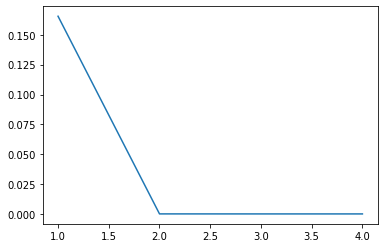

In [7]:
# Plotting loss graph.
import matplotlib.pyplot as plt
niter = [1, 2, 3, 4]
plt.plot(niter, Cost)
plt.show()